## N차 과제 - Time Series Analysis_주가예측

- 주제: 시계열 모델을 주가 데이터에 대한 시계열 예측 및 분석
- 데이터: 주식 데이터(크롤링 or 라이브러리로 데이터 불러오기)
- 사용 라이브러리: yfinance, datareader, statsmodels, matplotlib etc.

In [140]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose


### 1. EDA 및 전처리

1.1 분석을 위해 사용할 특정 주식(1개)의 데이터를 불러오거나 크롤링하여 가져오세요(**최소 3년 이상의 데이터 추출 권고**).

In [142]:
data = yf.download('^GSPC', start='2010-01-01', end='2023-01-01')

print(data.head())
print(data.describe())

[*********************100%***********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04  1116.560059  1133.869995  1116.560059  1132.989990  1132.989990   
2010-01-05  1132.660034  1136.630005  1129.660034  1136.520020  1136.520020   
2010-01-06  1135.709961  1139.189941  1133.949951  1137.140015  1137.140015   
2010-01-07  1136.270020  1142.459961  1131.319946  1141.689941  1141.689941   
2010-01-08  1140.520020  1145.390015  1136.219971  1144.979980  1144.979980   

                Volume  
Date                    
2010-01-04  3991400000  
2010-01-05  2491020000  
2010-01-06  4972660000  
2010-01-07  5270680000  
2010-01-08  4389590000  
              Open         High          Low        Close    Adj Close  \
count  3272.000000  3272.000000  3272.000000  3272.000000  3272.000000   
mean   2401.114671  2414.288380  2386.763243  2401.485877  2401.485877   
std     989.118480   995.269106   982.269143   98

In [144]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000


1.2 결측치가 있는지 확인하고 있다면 제거해주세요.

In [147]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

1.3 일자를 인덱스로 설정하고 시간 순서대로 정렬하세요.

In [150]:
data.sort_index(inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000


1.4 수정종가(adj close)와 거래량(volume)을 시각화하세요.

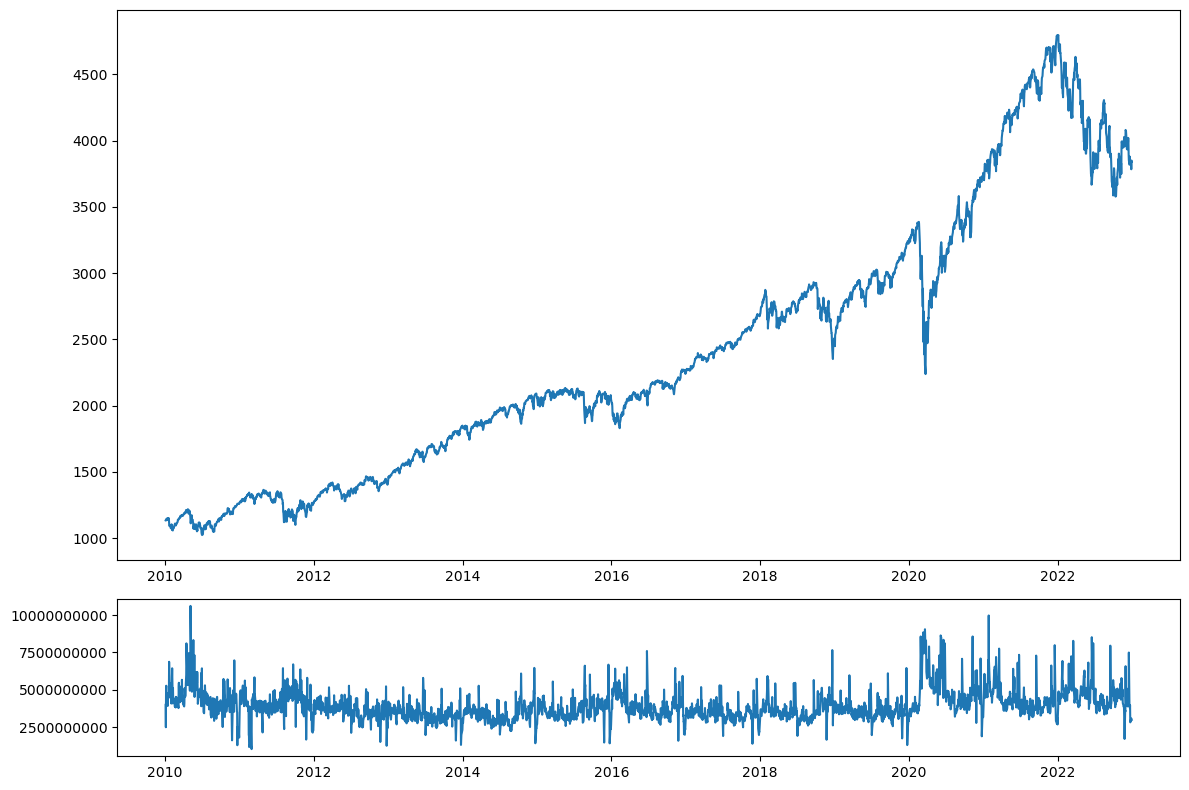

In [153]:
fig = plt.figure(figsize=(12, 8))

top_axes = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)#거래량 값으로서 큰 값이 발생할 때 그 값을 오일러 상수(e)의 지수 형태로 표현되지 않게 함

top_axes.plot(data.index, data['Adj Close'], label='Adjusted Close')
bottom_axes.plot(data.index, data['Volume'])

plt.tight_layout()
plt.show()

1.5 위 시각화 과정을 통해 알 수 있는 내용에 대해 작성하세요.

In [76]:
s&p500는 주가가 2010-2022까지 꾸준히 계속.. 상승하는 것을 볼 수 있다. 
코로나 시기인 2020년에는 급락하여서 거래량이 갑자기 증가한것을 볼 수 있다. 
또한 2021년도 상반기에 거래량이 급증한 시기가 존재했다. 
2022-2023에는 주가가 하락하는 것을 볼 수 있다.

SyntaxError: invalid syntax (3438150207.py, line 1)

### 2. 추세 및 정상성 검정

2.1 시계열 데이터의 정상성을 검증하도록 하겠습니다. 시계열 데이터 말하는 정상성(stationarity)이 무엇인지 왜 해야 하며 비정상성의 해결 방법에는 무엇이 있는지 작성하세요.

시계열 데이터가 시점에 무관하게 과거, 현재, 미래의 분포가 같을 때 정상성을 띤다고 말한다. 정상성을 띠고 있어야 ARIMA 분석을 통해 미래 시계열 값을 예측할 수 있기 때문에 해야한다.
비정상성의 해결 방법에는 차분, 로그 변환, 계절성 차분등이 존재한다.

2.2 먼저 ADF Test를 수행하겠습니다. statsmodels의 adfuller 라이브러리를 import 한 후 수정 종가에 대한 검정을 수행하고 결과를 출력하세요(p-value 포함).

ADF Test란? - https://hongl.tistory.com/98

In [155]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Adj Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -0.5726348948837541
p-value: 0.8770463105985711
Critical Values: {'1%': -3.4323674112281393, '5%': -2.8624313714499374, '10%': -2.5672444962719756}


2.3 ADF Test 결과를 해석하세요.

p-value가 0.05보다 크므로 귀무가설을 기각할 수 없으므로 비정상성을 띤다.

2.4 ACF 그래프와 PACF 그래프를 그려보도록 하겠습니다. 먼저 ACF와 PACF 각각이 어떻게 다른지 설명하세요.

acf: 시차에 따른 일련의 자기상관을 의미하며, 시차가 커질수록 0에 가까워진다. 정상 시계열은 빠르게 0에 수렴하고, 비정상 시계열은 천천히 감소한다.
pacf: 시차에 따른 일련의 편자기상관을 의미하며, 시차가 다른 두 시계열 데이터 간의 순수한 상호 연관성이다. 

2.5 statsmodels의 plot_acf, plot_pacf 라이브러리를 import하고 Adj close값에 대한 ACF, PACF 그래프를 출력하세요.

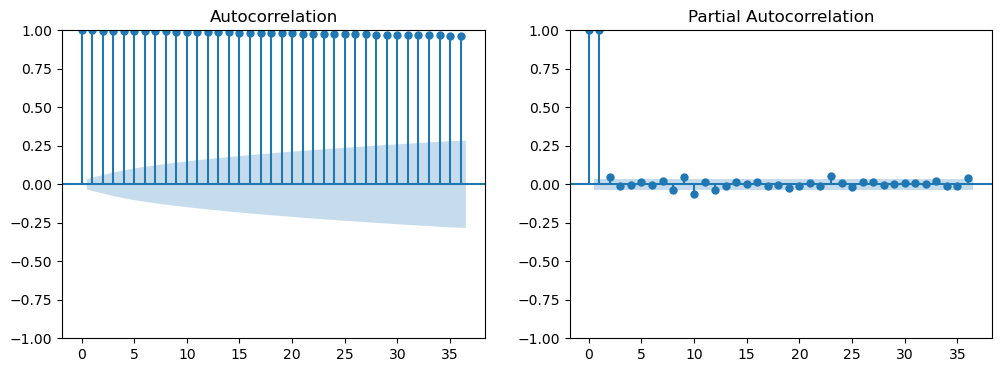

In [162]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

close_data = data['Close']

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(close_data, ax=ax[0])
plot_pacf(close_data, ax=ax[1])

plt.show()

2.6 결과를 해석하세요.

ACF 도표를 보면 상관관계가 거의 1로 계속 유지되며, 신뢰구간 안에 들어가지도 못하는 모습이다. 즉, 안정적이지 않음을 보여주고 있다.
또한 PACF 역시 시차 차이가 1인 것까지 상관관계가 높은것을 볼수있다.

2.7 마지막으로 계절성이 있는지 여부를 확인하겠습니다. statsmodels의 seasonal_decompose 라이브러리를 import하고 plot을 출력하세요.

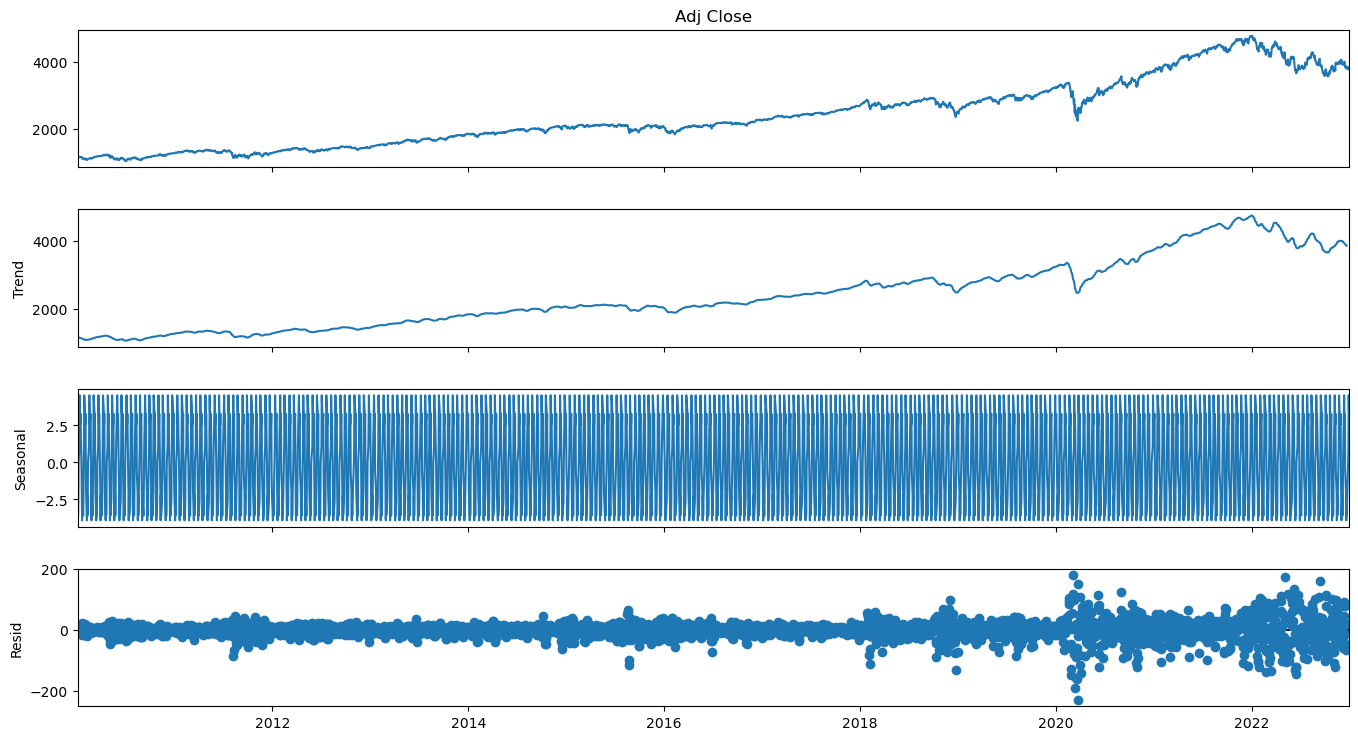

In [174]:
decomposition = seasonal_decompose(data['Adj Close'], period=12)

fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()

2.8 위 결과를 해석하세요.

원본데이터: 2010-2022까지 꾸준히 성장하다가 2022-2023은 약간의 하락으로 바뀐 것을 알 수 있다.
추세: 원본데이터와 비슷하게 진행되고 있다.
계절성: 일정주기로 반복되는 것을 보여주고 있다.
잔차: 2010-2018까지는 0에 가까운 값으로 보여주다가 2018-현재에는 분포되고 있음을 알 수 있다.

2.9 위에서 진행한 검정 과정 및 시각화 결과를 종합해봤을 때 현 데이터는 비정상성임을 알 수 있습니다. 따라서 차분을 통해 이를 해결하도록 하겠습니다. 먼저 차분이 어떤 것인지에 대해 설명하세요.

차분은 t시점과 t-1시점의 값의 차이를 구하는 것을 말한다.
차분을 하게 되면 값의 차이는 평균이 일정하기 때문에 정상성을 띠게 된다.

2.10 1차 차분을 진행하도록 하겠습니다. diff() 함수를 활용해 1차 차분을 진행한 후 ADF Test를 수행하여 정상성 여부를 확인하세요.

In [188]:
diff_1 = close_data.diff(periods=1).dropna()
adf_test(diff_1)

ADF Statistic: -5.102323
p-value: 0.000014


2.11 추가로 위에서 그려보았던 plot들을 다시 그려보면서 비교를 통해 정상성 여부를 확인해보도록 하겠습니다. ACF PACF plot, 계절성 분해 plot을 그려보세요.

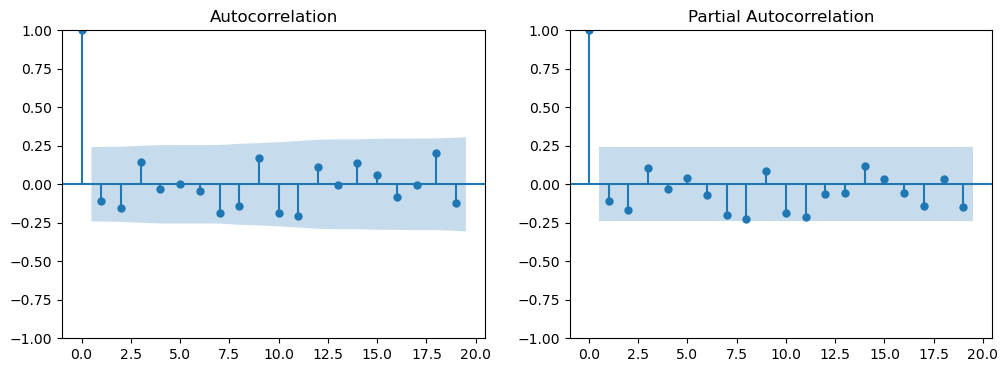

In [198]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(diff_1, ax=ax[0])
plot_pacf(diff_1, ax=ax[1])
plt.show()

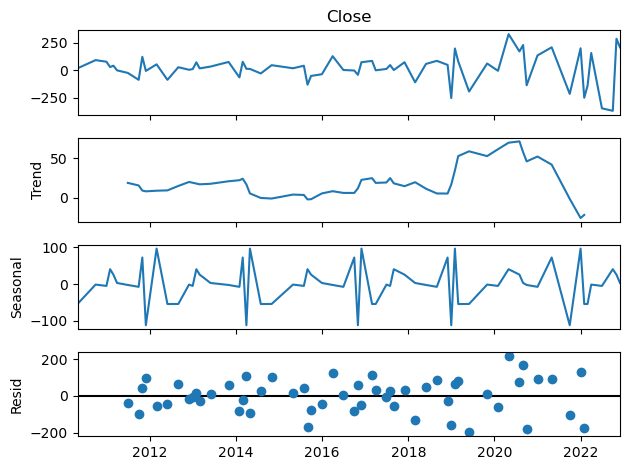

In [202]:
decomposition_1 = seasonal_decompose(diff_1, period=12)

fig_1 = decomposition_1.plot()
plt.show()

### 3. 예측

3.1 데이터의 정상성을 확인했으니 본격적으로 예측 및 분석을 진행해보도록 하겠습니다.

아래 코드는 예시이므로 예시에서 사용된 모델이 아닌 다른 모델(ex. ARIMAX, ARCH/GARCH, LSTM, Transformer, DLinear etc.)를 사용하고 애플이 아닌 다른 주식을 사용해 예측 및 분석을 진행해주세요(**위에서 진행한 과정 역시 모두 예시이므로 새로운 주식에 대한 전처리 및 정상성 검정을 새로 진행해야 함**).

In [214]:
from statsmodels.tsa.arima.model import ARIMA

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


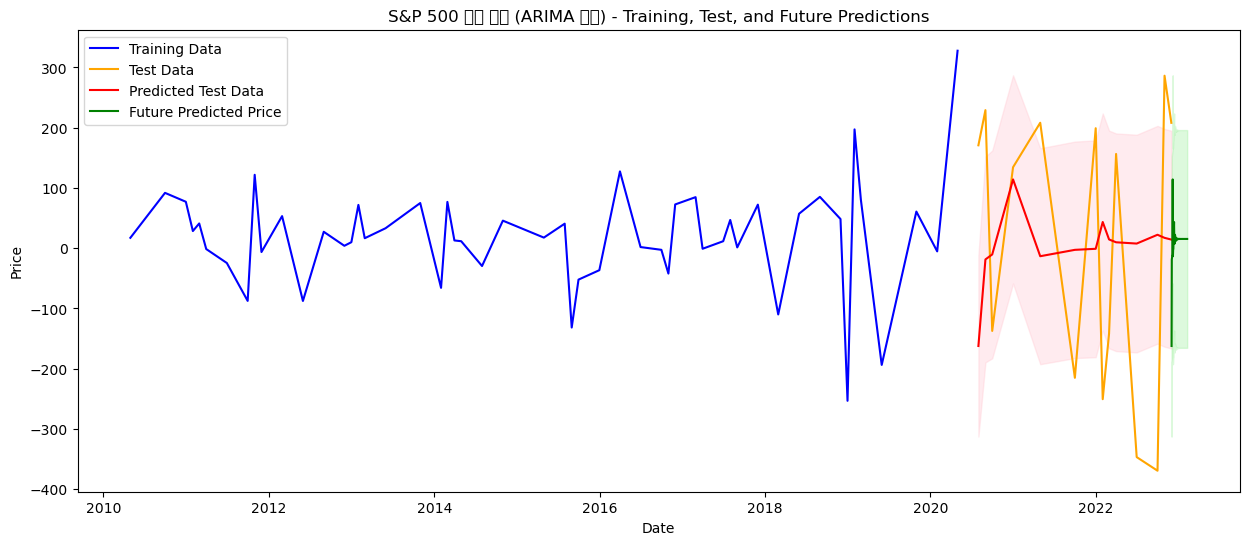

In [330]:
# 데이터 분할 (8:2 비율로 학습용과 테스트용 데이터 분할)
train_size = int(len(diff_1) * 0.8)
train_data, test_data = diff_1.iloc[:train_size], diff_1.iloc[train_size:]

# ARIMA 모델 학습 (p=3, d=0, q=0)
model = ARIMA(train_data, order=(3, 0, 0))
model_fit = model.fit()

# 테스트 데이터에 대한 예측 수행
forecast_result = model_fit.get_forecast(steps=len(test_data))  # 테스트 데이터만큼 예측
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# 미래 50일 추가 예측 수행
future_forecast_result = model_fit.get_forecast(steps=50)  # 향후 50일 예측
future_forecast = future_forecast_result.predicted_mean
future_conf_int = future_forecast_result.conf_int()

# 예측 결과 시각화
plt.figure(figsize=(15, 6))

# 학습 데이터, 테스트 데이터, 예측 데이터 그리기
plt.plot(train_data.index, train_data, label='Training Data', color='blue')
plt.plot(test_data.index, test_data, label='Test Data', color='orange')
plt.plot(test_data.index, forecast, label='Predicted Test Data', color='red')
plt.fill_between(test_data.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)

# 향후 50일 예측 데이터 그리기
plt.plot(future_dates, future_forecast, label='Future Predicted Price', color='green')
plt.fill_between(future_dates, future_conf_int.iloc[:, 0], future_conf_int.iloc[:, 1], color='lightgreen', alpha=0.3)

# 그래프 제목 및 축 레이블 설정
plt.title('S&P 500 종가 예측 (ARIMA 모델) - Training, Test, and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


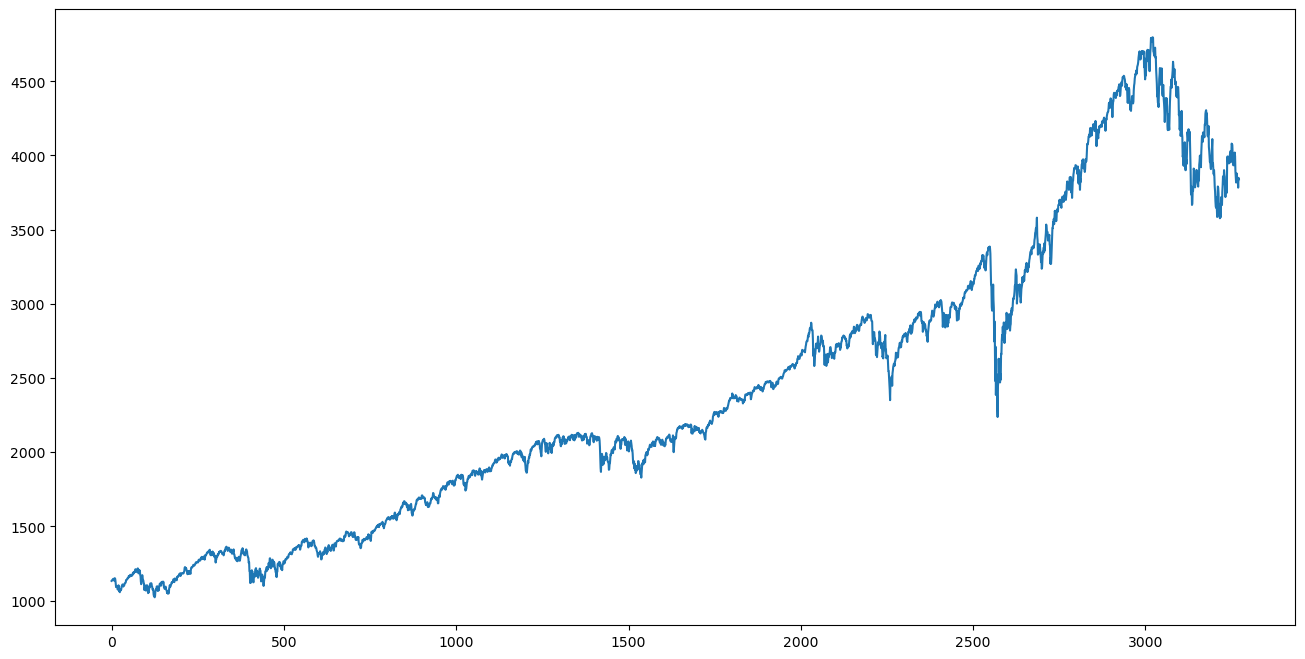

In [392]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler

df = yf.download('^GSPC', start='2010-01-01', end='2023-01-01')
df.reset_index(inplace=True)

plt.figure(figsize=(16,8))
plt.plot(df["Adj Close"],label='Adj Close Price history')

In [394]:
data = df.sort_index(ascending=True, axis=0)
new_dataset = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])

for i in range(len(data)):
    new_dataset.loc[i, "Date"] = data.loc[i, 'Date']
    new_dataset.loc[i, "Close"] = data.loc[i, "Adj Close"]

In [396]:
new_dataset['Date'] = pd.to_datetime(new_dataset['Date'])
new_dataset.set_index('Date', inplace=True)

final_dataset = new_dataset.values

train_data = final_dataset[0:2513, :]
valid_data = final_dataset[2513:, :]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_dataset)

x_train_data, y_train_data = [], []
for i in range(60, len(train_data)):
    x_train_data.append(scaled_data[i - 60:i, 0])
    y_train_data.append(scaled_data[i, 0])

x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)

x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

In [398]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2453/2453 - 18s - 7ms/step - loss: 5.6526e-04


In [402]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
train_data=new_dataset[:2513]
valid_data=new_dataset[2513:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

/var/folders/h8/dmd1y6b53tsb2vww703kllvw0000gn/T/ipykernel_18435/294528965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price
